# Cottrell Simulations
Based on the Fortran code found in appendix B of "Electrochemical Methods: Second Edition" by Bard and Faulkner.

In [95]:
import numpy as np
import matplotlib.pyplot as plt

### Parameter assignment for simulation

In [96]:
# Constants 
l = 100 # Number of mesh points 
DMA = 0.40 # Model Diffusion Coefficient
DMB = DMA # Both species have the same Diffusion coefficients
k_iter = 100 # Number of Time Iteration Points

# Creating arrays for the fractional concentrations
fa_old = np.ones(100) 
fa_new = np.ones(100)
fb_old = np.zeros(100)
fb_new = np.zeros(100)

# Creating arrays for several data sets used in plotting
Z = np.zeros(l) # Current array 
T = np.zeros(l) # Time array
X = np.ones(l) # Distances from the electrode array 
concentration_a = np.zeros(l) # Concentration of oxidized species
concentration_b = np.zeros(l) # Concentration of reduced species


### Numerical Simulation

In [97]:
# Loop for determining arrays
for k in range(0, k_iter):

    # Populating the time values
    T[k]=(k-0.5)/l 

    # Diffusion Into the First Box
    fa_new[0] = fa_old[0] + DMA*(fa_old[1]-fa_old[0])
    fb_new[0] = fb_old[0] + DMA*(fb_old[1]-fb_old[0])

    # Creating a new J_max for each loop that allows for many iterations to grow over time
    J_max = 4.2*np.sqrt(k)

    # Diffusion beyond the first box
    for j in range(1, int(J_max)):
        fa_new[j] = fa_old[j]+DMA*(fa_old[j-1]-2*fa_old[j]+fa_old[j+1])
        fb_new[j] = fb_old[j]+DMA*(fb_old[j-1]-2*fb_old[j]+fb_old[j+1])

    # Faradaic Conversion and Current Flow
    Z[k] = np.sqrt(l/DMA)*fa_new[0]
    fb_new[0] = fb_new[0]+fa_new[0]
    fa_new[0] = 0

    # Set up old arrays for next iteration
    for j in range(0, int(J_max)):
        # X[j] = (j-1)/np.sqrt(DMA*l)
        fa_old[j]=fa_new[j]
        fb_old[j] =fb_new[j]

    # Populating the distance aray
    for j in range(0, l):
        X[j] = (j-1)/np.sqrt(DMA*l)

    # Pulling concentration profiles at a specific iteration point
    if k == 20:
        concentration_a = fa_new
        concentration_b = fb_new

Zcott=1/np.sqrt(np.pi*T) # Current derived from the Cottrell equation
R = Z/Zcott # Ratio of simulation current to Cottrell equation currents

C:\Users\IBIS\AppData\Local\Temp\ipykernel_284\2611855366.py:39: RuntimeWarning: invalid value encountered in sqrt
  Zcott=1/np.sqrt(np.pi*T) # Current derived from the Cottrell equation


## Plots 

### Both Currents on the same plot

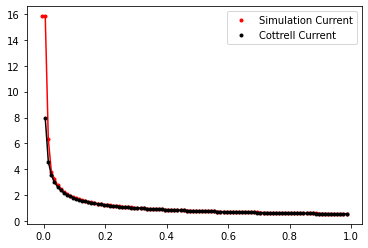

In [98]:
fig = plt.figure(figsize = (6,4))

#Trends of interest
plt.plot(T,Z,'-', color = 'red')
plt.plot(T,Z,'.', color = 'red', label = 'Simulation Current')
plt.plot(T,Zcott, '-', color = 'black')
plt.plot(T,Zcott, '.', color = 'black', label = 'Cottrell Current')
#Legend
plt.legend(loc="upper right")

### Current Ratio Plots

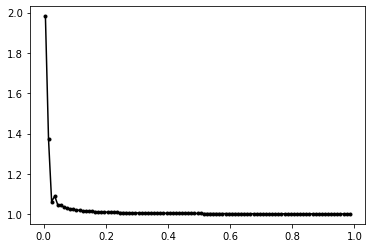

In [99]:
fig = plt.figure(figsize = (6,4))

#Trend 
plt.plot(T,R,'-', color = 'black')
plt.plot(T,R,'.', color = 'black')

### Concentration Profiles

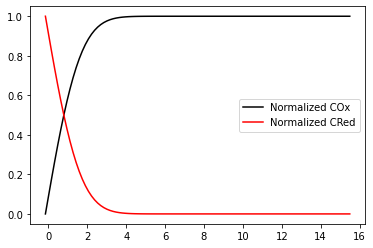

In [100]:
fig = plt.figure(figsize = (6,4))

#Trend 
plt.plot(X,concentration_a,'-', color = 'black', label = 'Normalized COx')
plt.plot(X,concentration_b,'-', color = 'red', label = 'Normalized CRed')

#Legend
plt.legend(loc="best")